In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [68]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [69]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [70]:
sns.set_style('whitegrid')

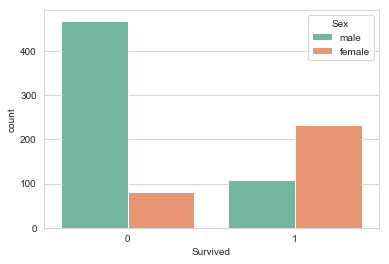

In [71]:
sns.countplot(x='Survived',hue = 'Sex',data=train,palette = 'Set2')

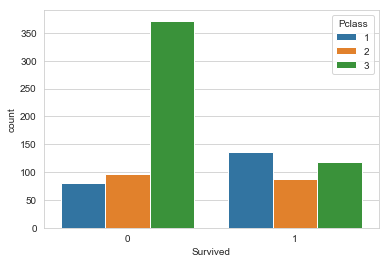

In [72]:
sns.countplot(x='Survived',hue = 'Pclass',data=train)

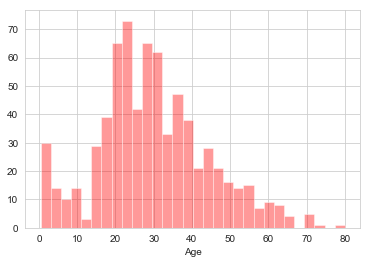

In [73]:
sns.distplot(train["Age"].dropna(),kde=False,bins=30,color='red')

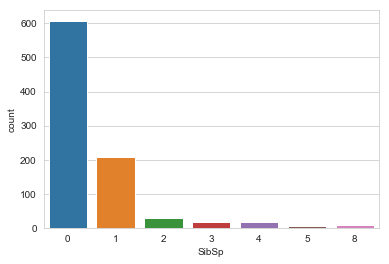

In [74]:
sns.countplot(x='SibSp',data=train)

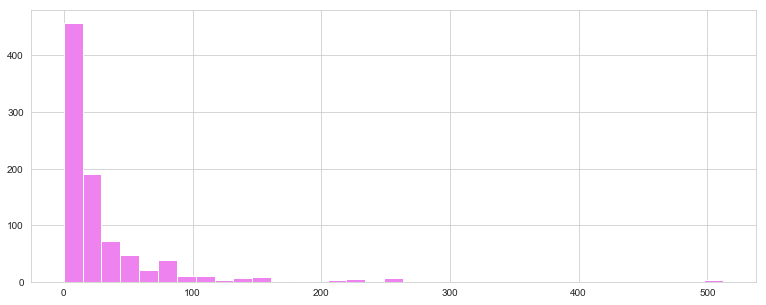

In [75]:
train['Fare'].hist(bins=35,figsize=(13,5),color='violet')

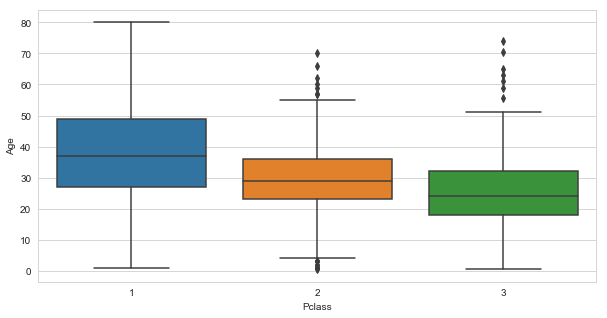

In [76]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Pclass',y='Age',data=train)

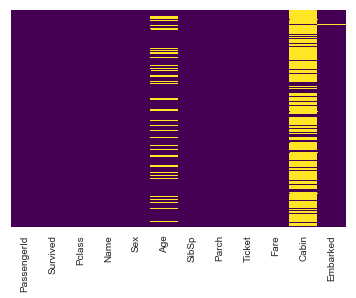

In [77]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

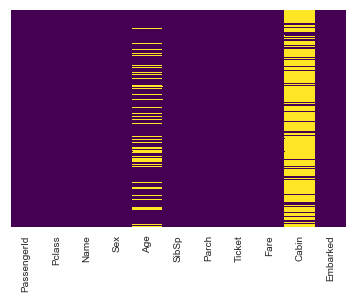

In [78]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [79]:
titanic = pd.concat([train,test],ignore_index=True)

C:\Users\vicky\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [81]:
titanic['Title'] = titanic['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
print(titanic['Title'].value_counts())

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Ms                2
Major             2
Lady              1
Capt              1
Don               1
Mme               1
Dona              1
Jonkheer          1
Sir               1
the Countess      1
Name: Title, dtype: int64


In [82]:
grouped = titanic.groupby(['Sex','Pclass', 'Title'])  
grouped.Age.median()

Sex     Pclass  Title       
female  1       Dona            39.0
                Dr              49.0
                Lady            48.0
                Miss            30.0
                Mlle            24.0
                Mme             24.0
                Mrs             45.0
                the Countess    33.0
        2       Miss            20.0
                Mrs             30.5
                Ms              28.0
        3       Miss            18.0
                Mrs             31.0
                Ms               NaN
male    1       Capt            70.0
                Col             54.5
                Don             40.0
                Dr              47.0
                Jonkheer        38.0
                Major           48.5
                Master           6.0
                Mr              41.5
                Sir             49.0
        2       Dr              38.5
                Master           2.0
                Mr              30.0
         

In [83]:
titanic['Age'] = grouped.Age.apply(lambda x: x.fillna(x.median()))
titanic.drop("Cabin",axis=1,inplace=True)
freq_port = titanic['Embarked'].dropna().mode()[0]
titanic['Embarked'] = titanic['Embarked'].fillna(freq_port)

In [84]:
titanic['Fare'].fillna(titanic['Fare'].dropna().median(),inplace=True)
titanic['Age'].fillna(titanic['Age'].dropna().median(),inplace=True)

In [85]:
sex_dummies = pd.get_dummies(titanic['Sex'],drop_first=True)
pclass_dummies = pd.get_dummies(titanic['Pclass'], prefix="Pclass")
title_dummies = pd.get_dummies(titanic['Title'], prefix="Title")
titanic = pd.concat([titanic,sex_dummies,pclass_dummies,title_dummies],axis=1)

In [86]:
titanic.drop(['PassengerId','Pclass','Sex','Embarked','Name','Ticket','Title'],axis=1,inplace=True)
titanic.head()

,Age,Fare,Parch,SibSp,Survived,male,Pclass_1,Pclass_2,Pclass_3,Title_Capt,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,22.0,7.2500,0,1,0.0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,38.0,71.2833,0,1,1.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,26.0,7.9250,0,0,1.0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,35.0,53.1000,0,1,1.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,35.0,8.0500,0,0,0.0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [87]:
tit_train = titanic[:891]
tit_train.tail()

,Age,Fare,Parch,SibSp,Survived,male,Pclass_1,Pclass_2,Pclass_3,Title_Capt,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
886,27.0,13.00,0,0,0.0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
887,19.0,30.00,0,0,1.0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
888,18.0,23.45,2,1,0.0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
889,26.0,30.00,0,0,1.0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
890,32.0,7.75,0,0,0.0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [88]:
tit_test = titanic[891:]
tit_test.tail()

,Age,Fare,Parch,SibSp,Survived,male,Pclass_1,Pclass_2,Pclass_3,Title_Capt,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
1304,26.0,8.0500,0,0,NaN,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1305,39.0,108.9000,0,0,NaN,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1306,38.5,7.2500,0,0,NaN,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1307,26.0,8.0500,0,0,NaN,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1308,6.0,22.3583,1,1,NaN,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


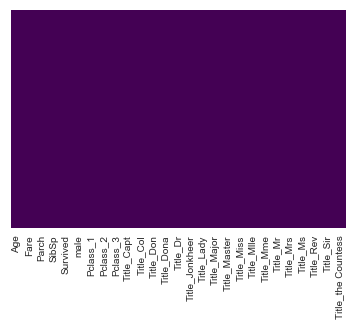

In [89]:
sns.heatmap(tit_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

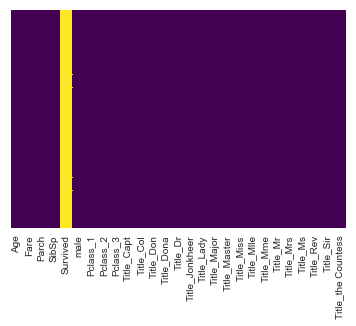

In [90]:
sns.heatmap(tit_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [92]:
X_train = tit_train.drop('Survived',axis=1)
y_train = tit_train['Survived']
X_test = tit_test.drop('Survived',axis=1)

In [117]:
#  LogisticRegression

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predict1 = logmodel.predict(X_test)
log_accuracy = round(logmodel.score(X_train,y_train)*100, 2)
print(log_accuracy)

82.94


C:\Users\vicky\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [122]:
#  RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
predict2 = rfc.predict(X_test).astype(int)
rfc_accuracy = round(rfc.score(X_train,y_train)*100, 2)
print(rfc_accuracy)

98.32


In [113]:
#  DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predict3 = dtree.predict(X_test)
dtree_accuracy = round(dtree.score(X_train,y_train)*100, 2)
print(dtree_accuracy)

98.32


In [111]:
#  K Nearest Neighbours

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
predict4 = knn.predict(X_test)
knn_accuracy = round(knn.score(X_train,y_train)*100, 2)
print(knn_accuracy)

97.87


In [110]:
#  Support Vector Machines

from sklearn.svm import SVC
svmmodel = SVC()
svmmodel.fit(X_train,y_train)
predict5 = svmmodel.predict(X_test)
svm_accuracy = round(svmmodel.score(X_train,y_train)*100, 2)
print(svm_accuracy)

85.3


C:\Users\vicky\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [109]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'KNN','Support Vector Machines'],
    'Score': [log_accuracy, rfc_accuracy, dtree_accuracy, knn_accuracy, svm_accuracy]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,0.983165
2,Decision Tree,0.983165
3,KNN,0.978676
4,Support Vector Machines,0.852974
0,Logistic Regression,0.829405


In [118]:
submission = pd.DataFrame({"PassengerId":test['PassengerId'], "Survived":predict2})
submission.to_csv('submission321.csv',index=False)

In [124]:
predict2

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,